# CHAPTER 2 - The Tools of the Trade in Quantum Computing - Qiskit Code

*Note*: You may skip the following two cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [1]:
#pip install qiskit==0.39.2

In [2]:
#pip install pylatexenc==2.10

In [19]:
from qiskit import *

In [20]:
qreg1 = QuantumRegister(size = 2, name = "qrg1")
qreg2 = QuantumRegister(1, "qrg2")
creg = ClassicalRegister(1, "oldschool")

qc = QuantumCircuit(qreg1, creg, qreg2)

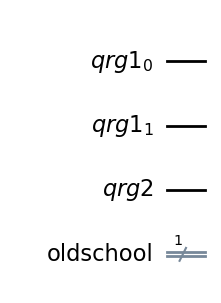

In [21]:
qc.draw("mpl")

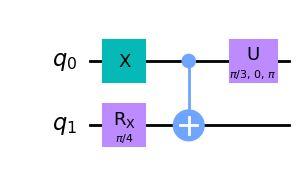

In [22]:
import numpy as np

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.x(0)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.u(np.pi/3, 0, np.pi, 0)

qc.draw("mpl")

In [23]:
from qiskit.providers.aer import AerSimulator

In [24]:
sim = AerSimulator()
sim_GPU = AerSimulator(device = 'GPU')

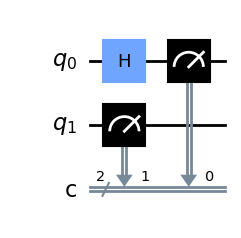

In [26]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.measure(range(2), range(2))
qc.draw("mpl")

In [27]:
job = execute(qc, sim, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 521, '01': 503}


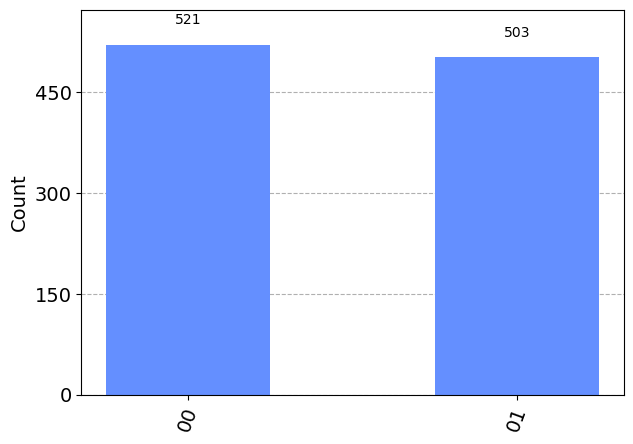

In [28]:
from qiskit.visualization import *
plot_histogram(counts)

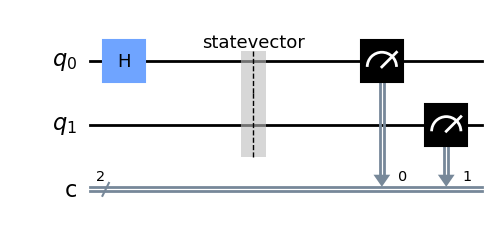

In [30]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.save_statevector()
qc.measure(0,0)
qc.measure(1,1)
qc.draw("mpl")

In [31]:
result = execute(qc, sim, shots = 1024).result()
sv = result.get_statevector()
print(sv)
counts = result.get_counts()
print(counts)

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
{'01': 508, '00': 516}


In [33]:
sim_u = AerSimulator(method = 'unitary')

qc = QuantumCircuit(1)
qc.h(0)
qc.save_unitary()

result = execute(qc, sim_u).result()
U = result.get_unitary(decimals = 4)
print(U)

Operator([[ 0.7071+0.j,  0.7071-0.j],
          [ 0.7071+0.j, -0.7071+0.j]],
         input_dims=(2,), output_dims=(2,))


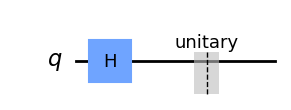

In [34]:
qc.draw("mpl")

*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [13]:
#ibm_token="1234"
#IBMQ.save_account(ibm_token)

In [35]:
provider = IBMQ.load_account()
print(provider.backends(simulator = False))

ibmqfactory.load_account:WARNING:2023-06-18 09:19:06,428: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [36]:
dev_list = provider.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)

In [37]:
from qiskit.providers.ibmq import *
dev = least_busy(dev_list)

In [40]:
dev

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
from qiskit.providers.ibmq.job import job_monitor

# Let us set up a simple circuit.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

# First, we run the circuit using the statevector simulator.
sim = AerSimulator()
result = execute(qc, sim, shots = 1024).result()
counts_sim = result.get_counts()

# Now we run it on the real device that we selected before.
job = execute(qc, dev, shots = 1024)
job_monitor(job)

result = job.result()
counts_dev = result.get_counts()

Job Status: job has successfully run               


In [18]:
print(counts_sim)
print(counts_dev)

{'11': 502, '00': 522}
{'00': 491, '01': 9, '10': 29, '11': 495}
